In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix,\
    accuracy_score, make_scorer
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.neural_network import MLPClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd drive/MyDrive/UFF/TCC/Implementação/

/content/drive/MyDrive/UFF/TCC/Implementação


In [4]:
df = pd.read_csv('forth_trace.csv')

# Filter
df = df.loc[~df['class'].isin(list(range(8,17)))]

X = df.drop(columns=['class'])
y = df['class']

# balanced_accuracy = (recall + specificity) / 2
metrics = ['f1_weighted', 'balanced_accuracy', 'accuracy']

## MLP

In [ ]:
for i in range(1,11):
    mpl = MLPClassifier(activation = 'logistic',
                    solver='adam',
                    alpha=1e-5,
                    learning_rate = 'invscaling',
                    max_iter = 1600,
                    hidden_layer_sizes=(i*50,),
                    random_state=42)

    result = cross_validate(mpl, X, y, cv=10, scoring=metrics,
                            return_train_score=True, n_jobs=-1)
    print("Hidden Layers = " + str(mpl.hidden_layer_sizes[0]) + ":")

    print("\tf1:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_f1_weighted').mean()*100,
                std = result.get('test_f1_weighted').std()))

    print("\tbalanced accuracy:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_balanced_accuracy').mean()*100,
                std = result.get('test_balanced_accuracy').std()))

    print("\taccuracy:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
          .format(mean = result.get('test_accuracy').mean()*100,
                  std = result.get('test_accuracy').std()))

# best hidden layer size: 450

Hidden Layers = 50:
	f1:
		mean = 59.89%;
		std = 0.04;
	balanced accuracy:
		mean = 57.07%;
		std = 0.04;
	accuracy:
		mean = 59.92%;
		std = 0.04;
Hidden Layers = 100:
	f1:
		mean = 61.68%;
		std = 0.05;
	balanced accuracy:
		mean = 58.72%;
		std = 0.05;
	accuracy:
		mean = 61.98%;
		std = 0.05;
Hidden Layers = 150:
	f1:
		mean = 61.54%;
		std = 0.04;
	balanced accuracy:
		mean = 58.50%;
		std = 0.04;
	accuracy:
		mean = 61.89%;
		std = 0.04;
Hidden Layers = 200:
	f1:
		mean = 62.48%;
		std = 0.05;
	balanced accuracy:
		mean = 59.75%;
		std = 0.05;
	accuracy:
		mean = 62.86%;
		std = 0.04;
Hidden Layers = 250:
	f1:
		mean = 62.34%;
		std = 0.04;
	balanced accuracy:
		mean = 59.49%;
		std = 0.04;
	accuracy:
		mean = 62.85%;
		std = 0.04;
Hidden Layers = 300:
	f1:
		mean = 63.03%;
		std = 0.05;
	balanced accuracy:
		mean = 60.34%;
		std = 0.05;
	accuracy:
		mean = 63.37%;
		std = 0.05;
Hidden Layers = 350:
	f1:
		mean = 62.42%;
		std = 0.05;
	balanced accuracy:
		mean = 59.55%;
		std =

## MLP Report

In [5]:
# Variables for average classification report
originalclass = []
predictedclass = []

#Make our customer score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

In [6]:


mlp = MLPClassifier(activation = 'logistic',
                    solver='adam',
                    alpha=1e-5,
                    learning_rate = 'invscaling',
                    max_iter = 1600,
                    hidden_layer_sizes=(500,),
                    random_state=42)

acc = cross_val_score(mlp, X=X, y=y, cv=10,
                      scoring=make_scorer(
                          classification_report_with_accuracy_score
                      ))

print("Accuracy")
print("mean = {mean:.2f}%;\tstd = {std:.2f};"
      .format(mean = acc.mean()*100,
              std = acc.std()))

# Average values in classification report for all folds in a K-fold Cross-validation
print(classification_report(originalclass, predictedclass))

Accuracy
mean = 63.51%;	std = 0.05;
              precision    recall  f1-score   support

           1       0.89      0.92      0.90      4081
           2       0.63      0.65      0.64      2189
           3       0.62      0.56      0.59      2202
           4       0.53      0.55      0.54      3664
           5       0.55      0.54      0.55      3670
           6       0.66      0.60      0.63      2328
           7       0.35      0.41      0.38      1178

    accuracy                           0.64     19312
   macro avg       0.61      0.60      0.60     19312
weighted avg       0.64      0.64      0.64     19312



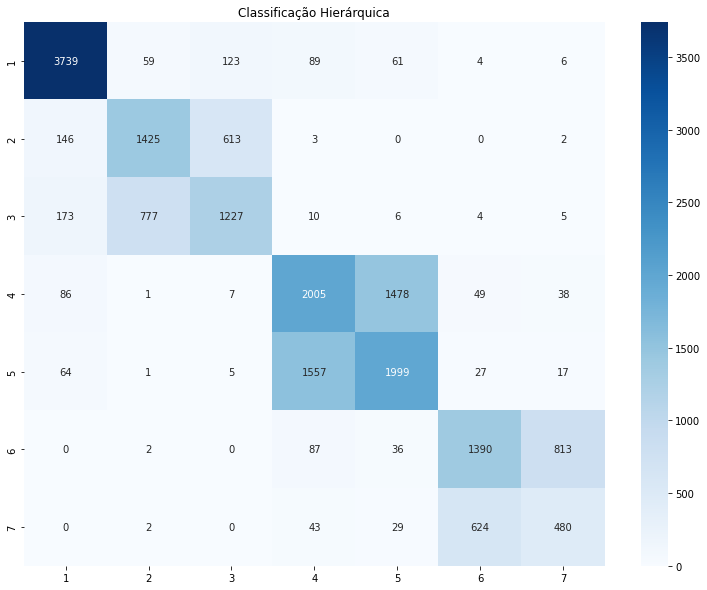

In [7]:
cf_matrix = confusion_matrix(originalclass, predictedclass)

categories = np.unique(y).tolist()
plt.figure(figsize=(13,10))
plt.title('Classificação Hierárquica')
sns.heatmap(cf_matrix, annot=True, fmt="", cmap='Blues', cbar=True, xticklabels=categories, yticklabels=categories)